<a href="https://colab.research.google.com/github/thaisrezendeb/ufes_machineLearning/blob/main/Exercicio6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**6. Para a base de dados Polinômio (disponibilizada em anexo), faça:**

**a) Divida aleatoriamente a base de dados em duas partes: treino, com 70% das amostras, e teste, com 30%. Use a parte de treino para estimar um modelo linear que melhor se ajusta aos dados, sendo a entrada do modelo a primeira coluna e a saída a segunda coluna. Informe os parâmetros do modelo encontrado e obtenha os valores de RMSE e MAPE sobre o conjunto de treino e teste. Mostre um gráfico do modelo estimado e dos pontos da base de dados. O modelo conseguiu se ajustar bem aos dados? Por
que?**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

polinomio = pd.read_csv("Polinomio.txt", sep="\s+", header=None)

#Seleção aleatória das amostras
sel_train = np.random.choice(polinomio.shape[0], round(polinomio.shape[0]*0.7), replace=False)
poli_train = polinomio.iloc[sel_train]
poli_test = polinomio.drop(sel_train)
#poli_train, poli_test = train_test_split(polinomio, train_size=0.7)

x = poli_train[0]
x.reset_index(inplace=True, drop=True)
t = poli_train[1]
t.reset_index(inplace=True, drop=True)

x_med = x.mean()
t_med = t.mean()
xt_med = (x * t).mean()
x2_med = (x * x).mean()

w1 = (xt_med - (x_med * t_med))/(x2_med - (x_med * x_med))
w0 = t_med - w1 * x_med

print("f(x) = {} + {}x".format(w0, w1)) 

#Métrica RMSE e MAPE para base de treino
sum_err = 0
sum_mape = 0
y_est = np.zeros((x.shape[0],1))
for i, val in x.items():
  fx = w0 + w1 * val
  y_est[i] = fx
  sum_err = sum_err + np.power(t[i]-fx, 2)
  sum_mape = sum_mape + abs((t[i]-fx)/ t[i])
  
rmse = np.sqrt(sum_err / x.size)
print("\nRMSE treino = {}".format(rmse))

mape = sum_mape / x.size * 100
print("MAPE treino = {}%".format(mape))

#Métrica RMSE para base de teste
x_test = poli_test[0]
x_test.reset_index(inplace=True, drop=True)
t_test = poli_test[1]
t_test.reset_index(inplace=True, drop=True)

sum_err = 0
sum_mape = 0
yt_est = np.zeros((x_test.shape[0],1))
for i, val in x_test.items():
  fx = w0 + w1 * val
  yt_est[i] = fx
  sum_err = sum_err + np.power(t_test[i]-fx, 2)
  sum_mape = sum_mape + abs((t_test[i]-fx)/ t_test[i])

rmse = np.sqrt(sum_err / x_test.size)
print("\nRMSE teste = {}".format(rmse))

mape = sum_mape / x_test.size * 100
print("MAPE teste = {}%".format(mape))

f(x) = -257.34324167284524 + 97.11929849978222x

RMSE treino = 218.80849924331505
MAPE treino = 336170.48318296357%

RMSE teste = 220.58490963610956
MAPE teste = 24144.665452256966%


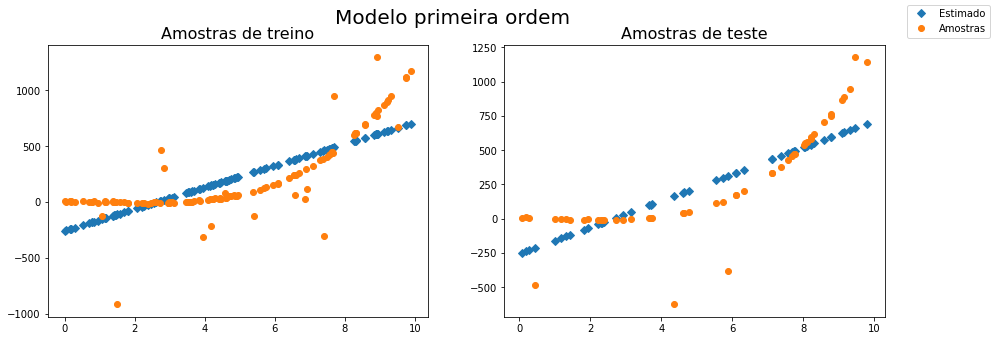

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle("Modelo primeira ordem", fontsize="20")

ax1.set_title("Amostras de treino", fontsize=16)
ax1.plot(x, y_est, "D")
ax1.plot(x, t, "o")

ax2.set_title("Amostras de teste", fontsize=16)
ax2.plot(x_test, yt_est, "D", label="Estimado")
ax2.plot(x_test, t_test, "o", label="Amostras")

fig.legend()

O modelo linear representa relativamente bem os dados quando a seleção das amostras de treino e de teste é aleatória. Ao se fazer a separação na sequência apresentada no arquivo, percebe-se que o modelo tente a se ajustar para as amostras de treino do início do gráfico, resultando em bons valores para a métrica de teste, mas pior para as amostras de teste, que estariam muito fora do modelo preditivo. Percebe-se pelo gráfico que as amostras têm uma tendência exponencial e, portanto, para mais pontos o modelo linear não seria bem ajustado. Para a seleção apresentada e considerando a simplicidade do modelo, pode-se dizer que a há média representatividade no modelo calculado.

In [ ]:
#Código para teste
#import numpy as np
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, median_absolute_error

#X = np.array(x).reshape(-1,1)
#y = np.array(t)
#reg = LinearRegression().fit(X, y)
#print(reg.score(X, y))
#print(reg.coef_)
#print(reg.intercept_)
#reg.predict(np.array([[3, 5]]))

#y_predict = reg.predict(X)

#print(mean_squared_error(y, y_predict))
#print(median_absolute_error(y, y_predict))

**b) Estimar o modelo polinomial que melhor se ajusta aos dados usando os dados de treinamento. Informe os parâmetros do modelo encontrado. Use os fatores de
determinação de complexidade QME e R2 dos modelos para auxiliar a encontrar o modelo. Varie do modelo linear até o modelo polinomial acima do melhor encontrado
(mostre os resultados obtidos de QME e R2 de cada modelo). Obtenha os valores RMSE e MAPE do modelo obtido sobre os dados de treino e teste. Mostre um gráfico com o novo modelo. O modelo conseguiu se ajustar melhor aos dados? Por que?**

In [ ]:
#Cálculo do QME para modelo de primeira ordem obtido anteriormente
sum_qme = 0
div_r2 = 0
for i, val in t.items():
  sum_qme = sum_qme + np.power(val-y_est[i], 2)
  div_r2 = div_r2 + np.power(val-t_med, 2)

qme = sum_qme/(t.size - 2)
print("QME primera ordem: {}".format(qme))

r2 = 1 - (sum_qme/div_r2)
print("R2 primeira ordem: {}".format(r2))

QME primera ordem: [52108.92129244]
R2 primeira ordem: [0.61481357]


In [ ]:
#Adição de uma coluna de segunda ordem ao modelo
x2 = pd.DataFrame(x)
x2[0] = 1
x2[1] = poli_train[0]
x2[2] = np.power(x2[1], 2)

#Matriz de coeficientes w
np.dot(x2.T, x2)
w = np.dot(np.dot(pd.DataFrame(np.linalg.pinv(np.dot(x2.T, x2))), x2.T), t)
print("Coeficientes: {}".format(w))

sum_err = 0
sum_mape = 0
y2_est = np.zeros_like(x2[1])

for i, row in x2.iterrows():
  fx = w[0] + (w[1] * row[1]) + (w[2] * row[2])
  y2_est[i] = fx
  sum_err = sum_err + np.power(t[i]-fx, 2)
  sum_mape = sum_mape + abs((t[i]-fx)/ t[i])
  
rmse = np.sqrt(sum_err / x.shape[0])
print("\nRMSE treino segunda ordem = {}".format(rmse))

mape = sum_mape / x2.shape[0] * 100
print("MAPE treino segunda ordem = {}%".format(mape))

#Métrica RMSE para base de teste
x2_test = pd.DataFrame(np.zeros((poli_test.shape[0], 1)))
x2_test[0] = 1
x2_test[1] = poli_test[0]
x2_test[2] = np.power(x2_test[1], 2)

sum_err = 0
sum_mape = 0
yt2_est = np.zeros((x2_test.shape[0],1))
for i, row in x2_test.iterrows():
  fx = w[0] + (w[1] * row[1]) + (w[2] * row[2])
  yt2_est[i] = fx
  sum_err = sum_err + np.power(t_test[i]-fx, 2)
  sum_mape = sum_mape + abs((t_test[i]-fx)/ t_test[i])

rmse = np.sqrt(sum_err / x2_test.shape[0])
print("\nRMSE teste segunda ordem = {}".format(rmse))

mape = sum_mape / x2_test.shape[0] * 100
print("MAPE teste segunda ordem = {}%".format(mape))

Coeficientes: [ 112.99171415 -126.29116632   22.43006985]

RMSE treino segunda ordem = 128.59734890395114
MAPE treino segunda ordem = 1001.5856477845105%

RMSE teste segunda ordem = 196.54972988261508
MAPE teste segunda ordem = 146022.32560643216%


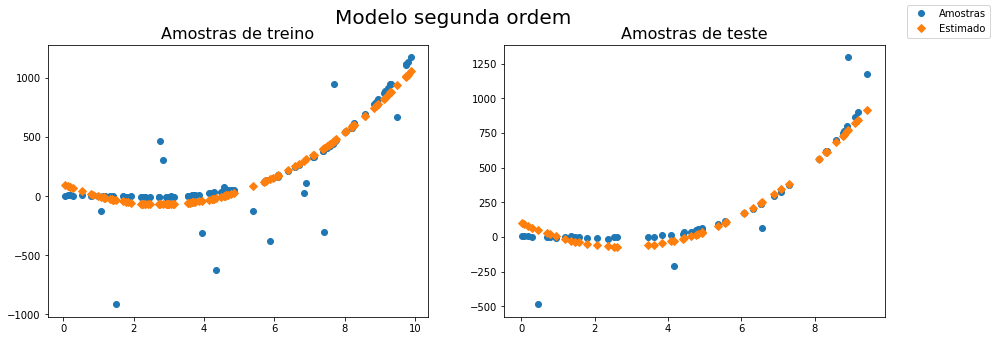

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle("Modelo segunda ordem", fontsize=20)

ax1.set_title("Amostras de treino", fontsize=16)
ax1.plot(x2[1], t, "o", label="Amostras")
ax1.plot(x2[1], y2_est, "D", label="Estimado")

ax2.set_title("Amostras de teste", fontsize=16)
ax2.plot(x2_test[1], t_test, "o")
ax2.plot(x2_test[1], yt2_est, "D")

fig.legend()

In [ ]:
#Cálculo do QME para modelo de segunda ordem
sum_qme = 0
div_r2 = 0
for i, val in t.items():
  sum_qme = sum_qme + np.power(val-y2_est[i], 2)
  div_r2 = div_r2 + np.power(val-t_med, 2)

qme = sum_qme/(t.size - 3)
print("QME segunda ordem: {}".format(qme))

r2 = 1 - (sum_qme/div_r2)
print("R2 segunda ordem: {}".format(r2))

QME segunda ordem: 16968.685401084313
R2 segunda ordem: 0.8640353117502172


In [ ]:
#Adição de uma terceira coluna ao modelo
x3 = x2
x3[3] = np.power(x3[1], 3)

#Matriz de coeficientes w
np.dot(x3.T, x3)
w = np.dot(np.dot(pd.DataFrame(np.linalg.pinv(np.dot(x3.T, x3))), x3.T), t)
print("Coeficientes: {}".format(w))

sum_err = 0
sum_mape = 0
y3_est = np.zeros_like(x3[1])

for i, row in x3.iterrows():
  fx = w[0] + (w[1] * row[1]) + (w[2] * row[2]) + (w[3] * row[3])
  y3_est[i] = fx
  sum_err = sum_err + np.power(t[i]-fx, 2)
  sum_mape = sum_mape + abs((t[i]-fx)/ t[i])
  
rmse = np.sqrt(sum_err / x.shape[0])
print("\nRMSE treino terceira ordem = {}".format(rmse))

mape = sum_mape / x3.shape[0] * 100
print("MAPE treino terceira ordem = {}%".format(mape))


#Métrica RMSE para base de teste
x3_test = x2_test
x3_test[3] = np.power(x3_test[1], 3)

sum_err = 0
sum_mape = 0
yt3_est = np.zeros((x3_test.shape[0],1))
for i, row in x3_test.iterrows():
  fx = w[0] + (w[1] * row[1]) + (w[2] * row[2]) + (w[3] * row[3])
  yt3_est[i] = fx
  sum_err = sum_err + np.power(t_test[i]-fx, 2)
  sum_mape = sum_mape + abs((t_test[i]-fx)/ t_test[i])

rmse = np.sqrt(sum_err / x3_test.shape[0])
print("\nRMSE teste terceira ordem = {}".format(rmse))

mape = sum_mape / x3_test.shape[0] * 100
print("MAPE teste terceira ordem = {}%".format(mape))

Coeficientes: [ -5.83172301  30.22157694 -18.67385878   2.83062429]

RMSE treino terceira ordem = 117.49281302442908
MAPE treino terceira ordem = 735.4404284550294%

RMSE teste terceira ordem = 193.89056443592415
MAPE teste terceira ordem = 28621.65549584896%


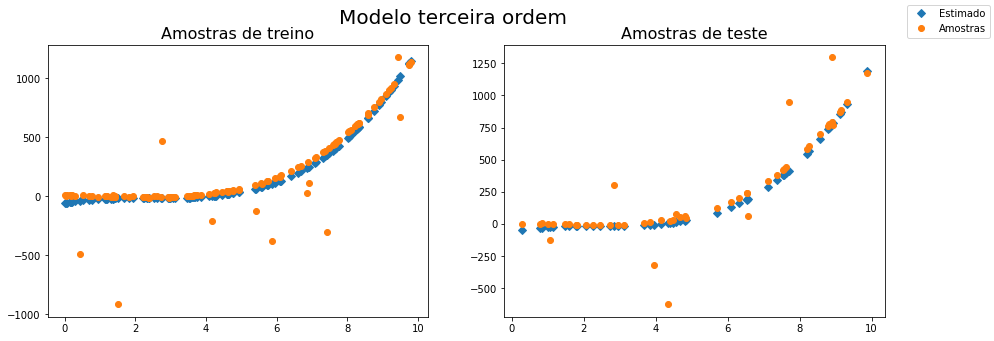

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle("Modelo terceira ordem", fontsize=20)

ax1.set_title("Amostras de treino", fontsize=16)
ax1.plot(x3[1], y3_est, "D", label="Estimado")
ax1.plot(x3[1], t, "o", label="Amostras")

ax2.set_title("Amostras de teste", fontsize=16)
ax2.plot(x3_test[1], yt3_est, "D")
ax2.plot(x3_test[1], t_test, "o")

fig.legend()

In [ ]:
#Cálculo do QME para modelo de terceira ordem
sum_qme = 0
div_r2 = 0
for i, val in t.items():
  sum_qme = sum_qme + np.power(val-y3_est[i], 2)
  div_r2 = div_r2 + np.power(val-t_med, 2)

qme = sum_qme/(t.size - 4)
print("QME terceira ordem: {}".format(qme))

r2 = 1 - (sum_qme/div_r2)
print("R2 terceira ordem: {}".format(r2))

QME terceira ordem: 14288.93167774059
R2 terceira ordem: 0.8865029159212031


In [ ]:
#Adição de uma quarta coluna ao modelo
x4 = x3
x4[4] = np.power(x4[1], 4)

#Matriz de coeficientes w
np.dot(x4.T, x4)
w = np.dot(np.dot(pd.DataFrame(np.linalg.pinv(np.dot(x4.T, x4))), x4.T), t)
print("Coeficientes: {}".format(w))

sum_err = 0
sum_mape = 0
y4_est = np.zeros_like(x4[1])

for i, row in x4.iterrows():
  fx = w[0] + (w[1] * row[1]) + (w[2] * row[2]) + (w[3] * row[3]) + (w[4] * row[4])
  y4_est[i] = fx
  sum_err = sum_err + np.power(t[i]-fx, 2)
  sum_mape = sum_mape + abs((t[i]-fx)/ t[i])
  
  #if abs((t[i]-fx)/ t[i]) > 500:
  #  print(i, abs((t[i]-fx)/ t[i]))
  #  print(t[i], fx)

rmse = np.sqrt(sum_err / x.shape[0])
print("\nRMSE treino quarta ordem = {}".format(rmse))

mape = sum_mape / x4.shape[0] * 100
print("MAPE treino quarta ordem = {}%".format(mape))

#Métrica RMSE para base de teste
x4_test = x3_test
x4_test[4] = np.power(x4_test[1], 4)

sum_err = 0
sum_mape = 0
yt4_est = np.zeros((x4_test.shape[0],1))
for i, row in x4_test.iterrows():
  fx = w[0] + (w[1] * row[1]) + (w[2] * row[2]) + (w[3] * row[3]) + (w[4] * row[4])
  yt4_est[i] = fx
  sum_err = sum_err + np.power(t_test[i]-fx, 2)
  sum_mape = sum_mape + abs((t_test[i]-fx)/ t_test[i])

rmse = np.sqrt(sum_err / x4_test.shape[0])
print("\nRMSE teste quarta ordem = {}".format(rmse))

mape = sum_mape / x4_test.shape[0] * 100
print("MAPE teste quarta ordem = {}%".format(mape))

Coeficientes: [-27.25298821  78.49967558 -41.12950185   6.38733352  -0.18044642]

RMSE treino quarta ordem = 117.1807672996778
MAPE treino quarta ordem = 1524.9021008305967%

RMSE teste quarta ordem = 193.86907472306427
MAPE teste quarta ordem = 38429.88714023307%


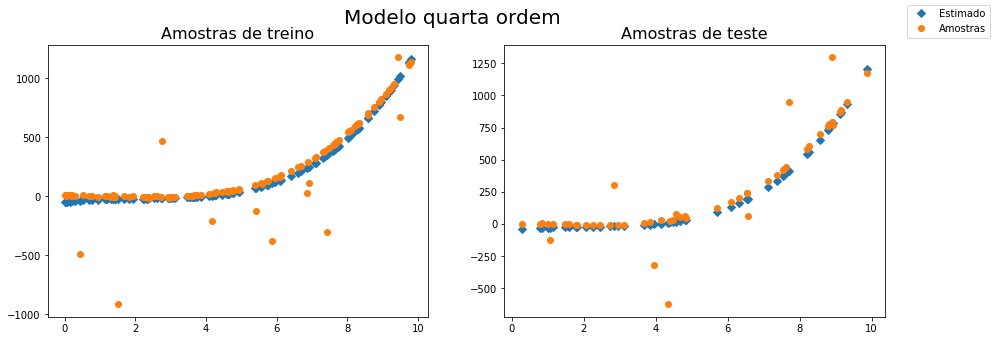

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle("Modelo quarta ordem", fontsize=20)

ax1.set_title("Amostras de treino", fontsize=16)
ax1.plot(x4[1], y4_est, "D", label="Estimado")
ax1.plot(x4[1], t, "o", label="Amostras")

ax2.set_title("Amostras de teste", fontsize=16)
ax2.plot(x4_test[1], yt4_est, "D")
ax2.plot(x4_test[1], t_test, "o")

fig.legend()

In [ ]:
#Cálculo do QME para modelo de quarta ordem
sum_qme = 0
div_r2 = 0
for i, val in t.items():
  sum_qme = sum_qme + np.power(val-y4_est[i], 2)
  div_r2 = div_r2 + np.power(val-t_med, 2)

qme = sum_qme/(t.size - 5)
print("QME quarta ordem: {}".format(qme))

r2 = 1 - (sum_qme/div_r2)
print("R2 quarta ordem: {}".format(r2))

QME quarta ordem: 14338.913296841292
R2 quarta ordem: 0.8871049825228496


Foram encontrados modelos de segunda, terceira e quarta ordens, sendo que o que apresentou melhor ajuste foi o de **terceira ordem**. Destaque para os valores de QME que do modelo de terceira ordem para o de quarta ordem teve um ligeiro aumento no valor, o que caracteriza que o modelo de terceira ordem é o que melhor se ajusta no que tange à variância do erro. Pela análise do fator R2 também pode-se observar que os modelos de ordem 3 e 4 possuem pouca variabilidade e, portanto, não justifica aumentar mais a complexidade para o pouco acréscimo de informação. Os índices de desempenho apresentaram valores elevados devido à presença de outliers cuja escala de valores é elevada.

**c) Utilize o método de Ransac sobre os dados de treinamento para remover os outliers e obter o modelo polinomial. Informe os parâmetros do modelo encontrado. Obtenha o RMSE e MAPE do modelo obtido sobre os dados de treino e teste. Mostre um gráfico com o novo modelo. O Ransac conseguiu ajustar melhor o modelo aos dados?**

Número de tentativas (L): 92
Número de amostras (T): 102
Tau: 686.329450345722
Coeficientes: [-38.43835938  70.63299125 -22.3890482    2.79351946]

Amostras dentro do limiar: 102
Modelo por RANSAC encontrado

RMSE treino RANSAC = 307.9802879419613
MAPE treino RANSAC = 9943.344545046953%

RMSE teste RANSAC = 197.5555311408021
MAPE teste RANSAC = 3366.689975373069%


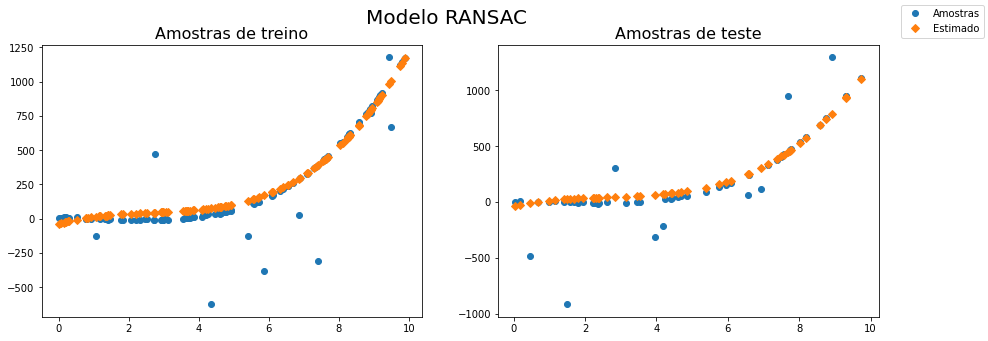

In [ ]:
#Determinação do número de tentativas para o método RANSAC
import math 

#Parâmetros estipulados para o modelo:
s = 20 #aproximadamente 17% das amostras
p = 0.99
e = 0.14 #considerando que são 118 amostras de treino e aproximadamente 9 outliers

L = math.ceil(np.log10(1-p) / np.log10(1-np.power((1-e), s)))
print("Número de tentativas (L): {}".format(L))

T = math.ceil(poli_train.shape[0] * (1-e))
print("Número de amostras (T): {}".format(T))

tau = np.sqrt(3.84 * t.var())
print("Tau: {}".format(tau))

#Passo 1: Escolher s amostras das amostras de treinamento
sel_train = np.random.choice(poli_train.shape[0], s), replace=False)
train_r = poli_train.iloc[sel_train]
#train_r, test_r = train_test_split(poli_train, train_size=s)
train_r.reset_index(inplace=True, drop=True)
xr = pd.DataFrame(np.zeros((train_r.shape[0], 1)))

#Passo 2: Estimar o modelo
xr[0] = 1
xr[1] = train_r[0]
xr[2] = np.power(xr[1], 2)
xr[3] = np.power(xr[1], 3)

tr = pd.DataFrame(np.zeros((train_r.shape[0], 1)))
tr = train_r[1]

#Matriz de coeficientes w
w = np.dot(np.dot(pd.DataFrame(np.linalg.pinv(np.dot(xr.T, xr))), xr.T), tr)
print("Coeficientes: {}".format(w))

sum_err = 0
sum_mape = 0
founded = False

for nr in range(L):
  #Passo 3: Encontrar número de amostras que estão dentro da distância tau
  k = 0
  x_ext = pd.DataFrame(poli_train[0])
  x_ext[1] = x_ext[0]
  x_ext[0] = 1
  x_ext[2] = np.power(x_ext[1], 2)
  x_ext[3] = np.power(x_ext[1], 3)

  trt = poli_train[1]
  yr_est = np.zeros_like(x_ext[0])
  
  for i, row in x_ext.iterrows():
    fx = w[0] + (w[1] * row[1]) + (w[2] * row[2]) + (w[3] * row[3])
    sum_err = sum_err + np.power(trt[i]-fx, 2)
    sum_mape = sum_mape + abs((trt[i]-fx)/ trt[i])

    yr_est[i] = fx
    erro = abs(fx - row[1])
    if erro < tau:
      k = k + 1

  #Passo 4: Verifica se o número de amostras está no limite
  if k >= T:
    founded = True
    break

print("\nAmostras dentro do limiar: {}".format(k))

if founded == True:
  print("Modelo por RANSAC encontrado")
  
  rmse = np.sqrt(sum_err / xr.shape[0])
  print("\nRMSE treino RANSAC = {}".format(rmse))

  mape = sum_mape / xr.shape[0] * 100
  print("MAPE treino RANSAC = {}%".format(mape))

  #Se achou, faz o cálculo também para as amostras de teste
  sum_err = 0
  sum_mape = 0

  trt2 = poli_test[1]
  yrt_est = np.zeros_like(x3_test[0])

  for i, row in x3_test.iterrows():
    fx = w[0] + (w[1] * row[1]) + (w[2] * row[2]) + (w[3] * row[3])
    yrt_est[i] = fx
    sum_err = sum_err + np.power(trt2[i]-fx, 2)
    sum_mape = sum_mape + abs((trt2[i]-fx)/ trt2[i])
  
  rmse = np.sqrt(sum_err / x3_test.shape[0])
  print("\nRMSE teste RANSAC = {}".format(rmse))

  mape = sum_mape / x3_test.shape[0] * 100
  print("MAPE teste RANSAC = {}%".format(mape))

  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_figheight(5)
  fig.set_figwidth(15)
  fig.suptitle("Modelo RANSAC", fontsize=20)

  ax1.set_title("Amostras de treino", fontsize=16)
  ax1.plot(x_ext[1], trt, "o", label="Amostras")
  ax1.plot(x_ext[1], yr_est, "D", label="Estimado")
  
  ax2.set_title("Amostras de teste", fontsize=16)
  ax2.plot(x3_test[1], trt2, "o")
  ax2.plot(x3_test[1], yrt_est, "D")
  
  fig.legend()
else:
  print("Modelo por RANSAC não encontrado")

Para esta base, o modelo por RANSAC foi ligeiramente inferior ao modelo polinomial de terceira ordem. Porém o resultado varia muito dependendo das amostras aleatórias. Porém, RANSAC leva vantagem por usar menos amostras que o modelo polinomial, tem-se um ganho na performance dos cálculos, que pode ser melhorada com pré-processamento da base para remover os outliers mais críticos antes de realizar o procedimento de regressão.